In [39]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [15]:
!pip3 install albumentations

Defaulting to user installation because normal site-packages is not writeable
  Using cached albumentations-1.4.6-py3-none-any.whl (153 kB)
     |████████████████████████████████| 13.3 MB 197 kB/s eta 0:00:01
     |████████████████████████████████| 35.4 MB 270 kB/s eta 0:00:01     |███████████████▉                | 17.5 MB 150 kB/s eta 0:02:00
     |████████████████████████████████| 174 kB 286 kB/s eta 0:00:01
     |████████████████████████████████| 409 kB 409 kB/s eta 0:00:01
     |████████████████████████████████| 1.8 MB 174 kB/s eta 0:00:01
  Using cached annotated_types-0.6.0-py3-none-any.whl (12 kB)
     |████████████████████████████████| 313 kB 199 kB/s eta 0:00:01
     |████████████████████████████████| 225 kB 366 kB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 122s 1us/step


In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0


In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [14]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.5178 - loss: 1.3397 - val_accuracy: 0.5936 - val_loss: 1.1360
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.6007 - loss: 1.1209 - val_accuracy: 0.6090 - val_loss: 1.0988
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6427 - loss: 1.0132 - val_accuracy: 0.6540 - val_loss: 0.9851
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.6720 - loss: 0.9305 - val_accuracy: 0.6740 - val_loss: 0.9371
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7015 - loss: 0.8490 - val_accuracy: 0.6708 - val_loss: 0.9402
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7179 - loss: 0.8039 - val_accuracy: 0.6995 - val_loss: 0.8856
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7351 - loss: 0.7581 - val_accuracy: 0.6932 - val_loss: 0.8835
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7442 -

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 4ms/step - accuracy: 0.6699 - loss: 3.9156

Test accuracy: 0.6699000000953674


Augumentations

In [98]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [54]:
len(train_images)

50000

In [99]:
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images = train_images.astype(np.float32)
test_images = test_images.astype(np.float32)

In [16]:
import albumentations as A

In [26]:
transform = A.Compose([
    A.RandomCrop(width=256, height=256),
    # A.HorizontalFlip(p=0.5),
    # A.RandomBrightnessContrast(p=0.2),
])

In [27]:
image = cv2.imread("/Users/pravinpb/pycode/openCV/workshop/assets/Young people with laptop.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [28]:
transformed = transform(image=image)


In [29]:
transformed_image = transformed["image"]


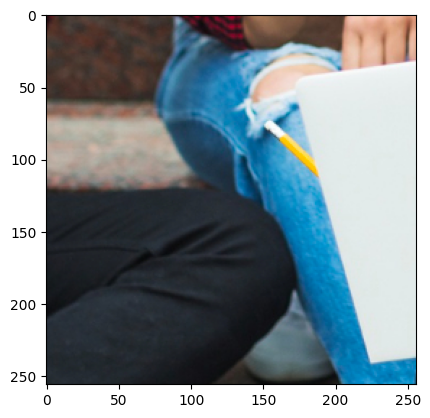

In [30]:
plt.imshow(transformed_image)

In [41]:
augmentation_pipeline = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=20, p=0.5),
    A.RandomResizedCrop(height=32, width=32, scale=(0.8, 1.0), p=0.5),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [105]:
augmented_train_images = []
for img in train_images:
    augmented_img = augmentation_pipeline(image=img)['image']
    augmented_train_images.append(augmented_img)

In [106]:
augmented_train_images = np.array(augmented_train_images)

augmented_train_labels = np.copy(train_labels)

In [107]:
train_size = int(0.8 * len(augmented_train_images))
val_size = len(augmented_train_images) - train_size
augmented_train_images, val_images = augmented_train_images[:train_size], augmented_train_images[train_size:]
augmented_train_labels, val_labels = augmented_train_labels[:train_size], augmented_train_labels[train_size:]

In [108]:
train_images = np.concatenate([train_images, val_images])
train_labels = np.concatenate([train_labels, val_labels])

In [95]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

/Users/pravinpb/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [112]:
history = model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - accuracy: 0.6680 - loss: 0.8654
Epoch 2/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - accuracy: 0.6764 - loss: 0.8432
Epoch 3/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 34s 15ms/step - accuracy: 0.6805 - loss: 0.8298
Epoch 4/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - accuracy: 0.6796 - loss: 0.8313
Epoch 5/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - accuracy: 0.6851 - loss: 0.8175
Epoch 6/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step - accuracy: 0.6850 - loss: 0.8126
Epoch 7/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step - accuracy: 0.6893 - loss: 0.8037
Epoch 8/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step - accuracy: 0.6918 - loss: 0.8018
Epoch 9/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step - accuracy: 0.6952 - loss: 0.7943
Epoch 10/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step - accuracy: 0.6965 - loss: 0.7888
Epoch 11/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step - accuracy: 0.6982 - loss: 0.7832
Epoch 12

In [111]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 2s - 5ms/step - accuracy: 0.6972 - loss: 1.3882

Test accuracy: 0.6972000002861023


In [109]:
len(train_images)

72000